In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('housing.csv')
x = df.drop(["median_house_value"],axis=1)
y = df['median_house_value']
# x.columns
x = pd.get_dummies(x,columns=["ocean_proximity"])
# print(x.dtypes)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=.30, random_state=42)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)


In [3]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso_regressor = Lasso()

In [ ]:
parameters = {'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
lassocv = GridSearchCV(lasso_regressor,parameters,scoring='neg_mean_squared_error', cv=5)
lassocv.fit(x_train_imputed, y_train)

c:\Users\nisha\anaconda3\envs\ml\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.355e+12, tolerance: 1.535e+10
  model = cd_fast.enet_coordinate_descent(
c:\Users\nisha\anaconda3\envs\ml\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.453e+12, tolerance: 1.570e+10
  model = cd_fast.enet_coordinate_descent(
c:\Users\nisha\anaconda3\envs\ml\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

,estimator,Lasso()
,param_grid,"{'alpha': [1, 2, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,1


In [10]:
print(lassocv.best_params_)


{'alpha': 1}


In [5]:
lasso_pred = lassocv.predict(x_test_imputed)

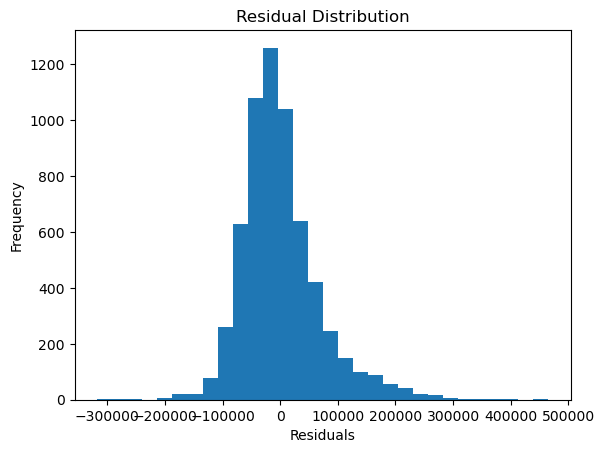

In [6]:
#visualization
residuals = y_test - lasso_pred
plt.figure()
plt.hist(residuals, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

In [7]:
# R2 Score of the model
from sklearn.metrics import r2_score
score=r2_score(y_test,lasso_pred)
score

0.6395660373503593